## Multiple Linear Regression

Multiple linear regression is a statistical technique used to model the relationship between one dependent variable and two or more independent variables. It's like expanding simple linear regression, which only deals with one independent variable, to consider the effect of multiple factors on the outcome.

The goal is to find the linear equation that best predicts the dependent variable based on the values of the independent variables.

Multiple linear regression helps in understanding how each independent variable contributes to the prediction of the dependent variable and can be used in various fields such as economics, finance, biology, and social sciences.

c:\Users\Rajat Bose\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:1283: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\Rajat Bose\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Model R² Score: nan
Predicted Price for new house: $750,000.00


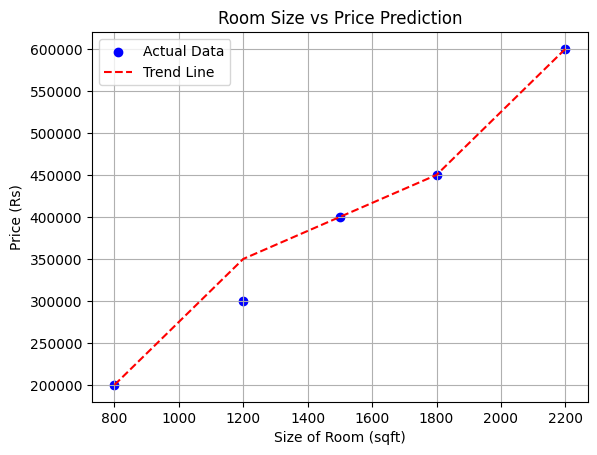

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Sample dataset
data = {
    "Rooms": [2, 3, 4, 5, 6],
    "Size": [800, 1200, 1500, 1800, 2200],  # Size in square feet
    "Location": [1, 2, 3, 2, 1],  # Encoded location (1 = Suburbs, 2 = City, 3 = Downtown)
    "Price": [200000, 300000, 400000, 450000, 600000]  # Price in Rs.
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Features (X) and target (y)
X = df[["Rooms", "Size", "Location"]]
y = df["Price"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Train the Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict prices
y_pred = model.predict(X_test)

# Compute R-squared value
r_squared = r2_score(y_test, y_pred)
print(f"Model R² Score: {r_squared:.4f}")

# Predict for a new house (Example: 4 rooms, 1600 sqft, city)
new_house = np.array([[3, 1600, 1]])
predicted_price = model.predict(new_house)
print(f"Predicted Price for new house: ${predicted_price[0]:,.2f}")

# Optional: Plot feature vs price trend
plt.scatter(df["Size"], df["Price"], color='blue', label="Actual Data")
plt.plot(df["Size"], model.predict(df[["Rooms", "Size", "Location"]]), color='red', linestyle='--', label="Trend Line")
plt.xlabel("Size of Room (sqft)")
plt.ylabel("Price (Rs)")
plt.title(f"Room Size vs Price Prediction")
plt.legend()
plt.grid(True)
plt.show()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df_index=pd.read_csv("economic_index.csv")

In [6]:
df_index.head()

,id,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [8]:
df_index.head()

,id,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [9]:
##check null values
df_index.isnull().sum()

id                   0
year                 0
month                0
interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


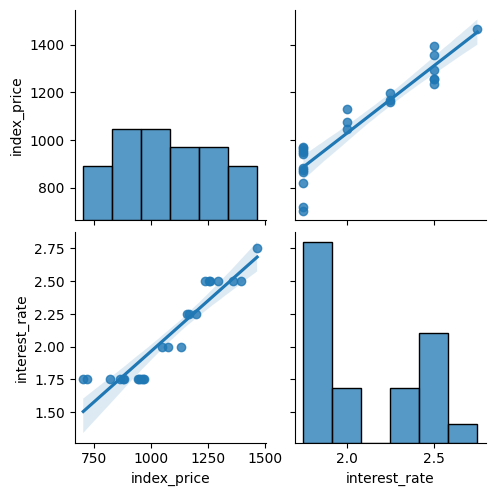

In [14]:
## Lets do some viualization
import seaborn as sns
sns.pairplot(df_index[['index_price', 'interest_rate']],kind='reg')


In [15]:
df_index.corr()

,id,year,month,interest_rate,unemployment_rate,index_price
id,1.000000,-8.667781e-01,-4.986939e-01,-0.934555,0.935300,-0.988246
year,-0.866778,1.000000e+00,7.884865e-14,0.882851,-0.877000,0.863232
month,-0.498694,7.884865e-14,1.000000e+00,0.339526,-0.351189,0.481287
interest_rate,-0.934555,8.828507e-01,3.395257e-01,1.000000,-0.925814,0.935793
unemployment_rate,0.935300,-8.769997e-01,-3.511891e-01,-0.925814,1.000000,-0.922338
index_price,-0.988246,8.632321e-01,4.812873e-01,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment rate')

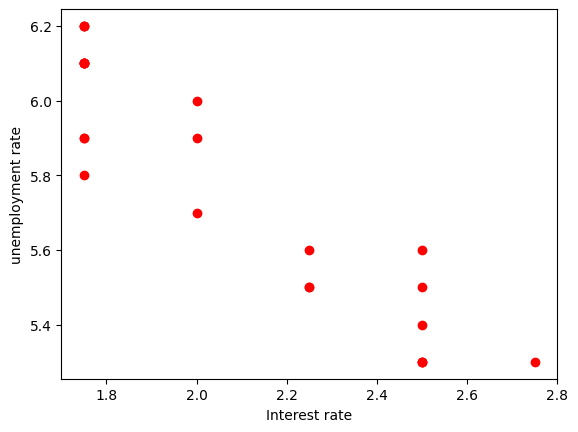

In [16]:
## Visualiza the datapoints more closely
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='r')
plt.xlabel("Interest rate")
plt.ylabel("unemployment rate")

In [ ]:
##independent and dependent features
X=df_index.iloc[:,:-1]
y=df_index.iloc[:,-1]

In [18]:
X.head()

,id,year,month,interest_rate,unemployment_rate
0,0,2017,12,2.75,5.3
1,1,2017,11,2.50,5.3
2,2,2017,10,2.50,5.3
3,3,2017,9,2.50,5.3
4,4,2017,8,2.50,5.4


In [19]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [20]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [21]:
import seaborn as sns

<Axes: xlabel='interest_rate', ylabel='index_price'>

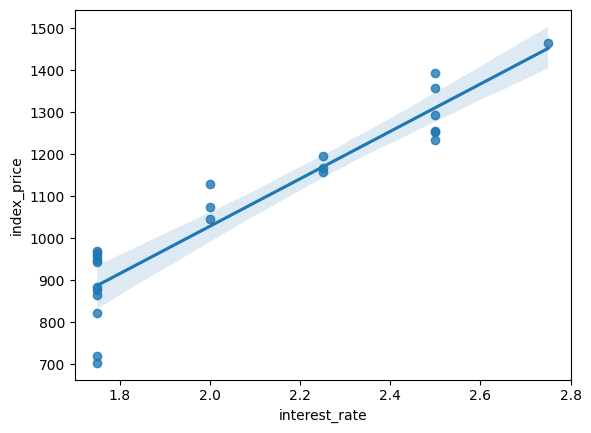

In [24]:
sns.regplot(x='interest_rate', y='index_price', data=df_index)

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

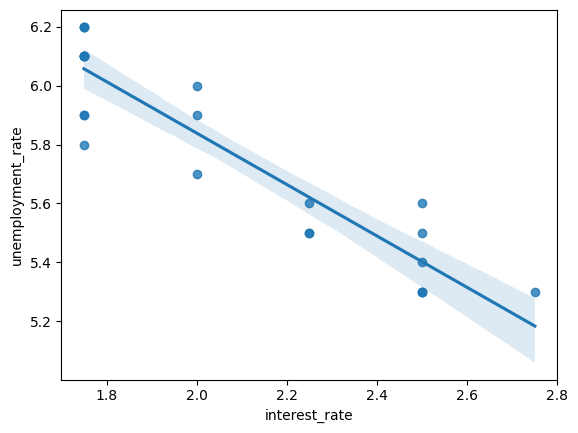

In [26]:
sns.regplot(x='interest_rate', y='unemployment_rate', data=df_index)

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [29]:
X_train

array([[ 0.15426662, -0.89442719,  1.25692828, -0.90115511,  0.37908503],
       [-1.51181292,  1.11803399,  1.25692828,  1.31077107, -1.48187786],
       [ 1.26498632, -0.89442719, -1.12462004, -0.90115511,  1.30956648],
       [-0.95645307,  1.11803399,  0.06615412,  1.31077107, -0.55139641],
       [-1.37297296,  1.11803399,  0.95923474,  1.31077107, -1.48187786],
       [ 0.01542666, -0.89442719,  1.55462182, -0.16384638,  0.68924552],
       [ 0.43194655, -0.89442719,  0.6615412 , -0.90115511,  0.999406  ],
       [-1.23413299,  1.11803399,  0.6615412 ,  1.31077107, -1.48187786],
       [-1.09529303,  1.11803399,  0.36384766,  1.31077107, -1.17171738],
       [ 1.40382628, -0.89442719, -1.42231358, -0.90115511,  1.30956648],
       [ 0.70962647, -0.89442719,  0.06615412, -0.90115511,  0.999406  ],
       [ 1.12614636, -0.89442719, -0.8269265 , -0.90115511,  0.37908503],
       [ 1.54266624, -0.89442719, -1.72000712, -0.90115511,  0.999406  ],
       [-0.67877315,  1.11803399, -0.5

In [30]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [31]:
regression.fit(X_train,y_train)

LinearRegression()

## Cross Val Score
cross_val_score is a handy function in the scikit-learn library in Python for evaluating a machine learning model, such as a linear regression model. It helps to assess how well your model will generalize to an independent dataset by performing cross-validation.

In cross-validation, the dataset is divided into several folds, typically 5 or 10. The model is trained on a subset of the data (training set) and evaluated on the remaining data (validation set). This process is repeated multiple times, and the model's performance is averaged over all the folds to provide a more reliable estimate.

In [ ]:
## cross validation
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',
                                cv=3)

In [35]:
np.mean(validation_score)

-1556.413287290555

In [36]:
## prediction
y_pred=regression.predict(X_test)

In [37]:
y_pred

array([1137.77287695,  852.80136784, 1374.71877553,  792.98757646,
       1052.52761415, 1109.85845574])

In [38]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

5741.011647603442
66.55555555559023
75.76946382021877


In [47]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)
#display adjusted R-squared
print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.8294647707506354


ZeroDivisionError: float division by zero

## Assumptions

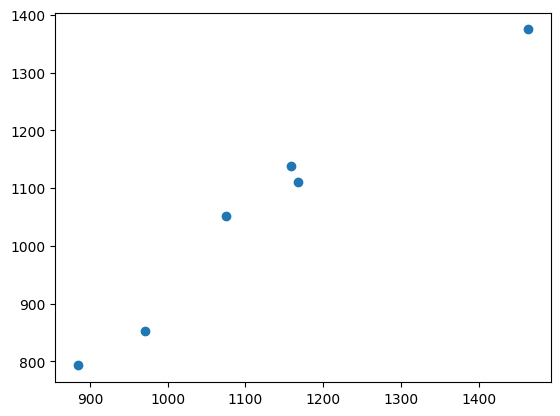

In [40]:
plt.scatter(y_test,y_pred)

In [41]:
residuals=y_test-y_pred
print(residuals)

8      21.227123
16    118.198632
0      89.281224
18     91.012424
11     22.472386
9      57.141544
Name: index_price, dtype: float64


"Kernel Density Estimation," which is a non-parametric way to estimate the probability density function of a random variable. When you mention "residual," it usually refers to the difference between observed values and the values predicted by a model.

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


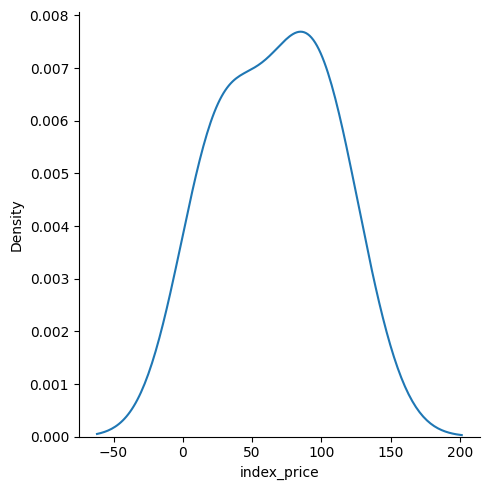

In [42]:
## Plot this residuals
sns.displot(residuals,kind='kde')

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np

# Sample dataset (5 students)
# Features: [Previous Exam Score, Attendance %, Assignment Score, Study Hours per Week]
X = np.array([
    [85, 90, 80, 10],  # Student 1
    [40, 60, 50, 3],   # Student 2
    [75, 80, 70, 8],   # Student 3
    [30, 50, 40, 2],   # Student 4
    [90, 95, 85, 12]   # Student 5
])

# Labels (Final Result): 1 = Pass, 0 = Fail
y = np.array([1, 0, 1, 0, 1])  # Corresponding results for the students

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the neural network model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Binary classification (Pass/Fail)
])

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test))

# Evaluating the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Making a prediction for a new student
new_student_data = np.array([[78, 85, 75, 9]])  # Example new student data
prediction = model.predict(new_student_data)
print("Predicted Result:", "Pass" if prediction[0] > 0.5 else "Fail")